### mecab 설치

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2022-11-06 06:12:49--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2022-11-06 06:12:49--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucefe13929fd6262131eee8f5c77.dl.dropboxusercontent.com/cd/0/get/BwNUzBF1hFEMtU0Ov6x4tnYqk4ke8FNfnzK0mqcPdewu-z0R4aljCjIWC7Ju8PqQQBEImndveSF89eEm80vM68ez5D4N060IqhaD4xGsRV-ltMrN4qRTlw5Xkbxf-63wKu5Cat4F6-4X1AYqY8EwCt1l83sJg2T0dv1-NwBcTPJoHjWWe4AnckuRFlMc9YVu11c/file?dl=1# [following]
--2022-11-06 06:12:50--  https://ucefe13929fd6262131eee8f5c77.dl.dropboxusercontent.com/cd/0/get/BwNUzBF1h

In [3]:
from konlpy.tag import Mecab
mecab = Mecab()
mecab.morphs('안녕하세용')

['안녕', '하세용']

In [4]:
#tokenizer.word_counts

In [5]:
"""
tokenizer1 = Tokenizer()
tokenizer2 = Tokenizer()
tokenizer3 = Tokenizer()
tokenizer1.fit_on_texts(voice_noun_join)
tokenizer2.fit_on_texts(impersonation_noun_join)
tokenizer3.fit_on_texts(fraud_noun_join)
voice_count_desc = sorted(tokenizer1.word_counts, key = lambda x : x[1], reverse = True)
impersonation_count_desc = sorted(tokenizer2.word_counts, key = lambda x : x[1], reverse = True)
fraud_count_desc = sorted(tokenizer3.word_counts, key = lambda x : x[1], reverse = True)
"""

'\ntokenizer1 = Tokenizer()\ntokenizer2 = Tokenizer()\ntokenizer3 = Tokenizer()\ntokenizer1.fit_on_texts(voice_noun_join)\ntokenizer2.fit_on_texts(impersonation_noun_join)\ntokenizer3.fit_on_texts(fraud_noun_join)\nvoice_count_desc = sorted(tokenizer1.word_counts, key = lambda x : x[1], reverse = True)\nimpersonation_count_desc = sorted(tokenizer2.word_counts, key = lambda x : x[1], reverse = True)\nfraud_count_desc = sorted(tokenizer3.word_counts, key = lambda x : x[1], reverse = True)\n'

In [6]:
# 데이터 불러오기
"""
with open('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/voice_phishing_stt/그놈목소리.txt', 'r', encoding='UTF8') as f :
  voice = f.readlines()
with open('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/voice_phishing_stt/수사기관사칭.txt', 'r', encoding='UTF8') as f :
  impersonation = f.readlines()
with open('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/voice_phishing_stt/은행사기.txt', 'r', encoding='UTF8') as f :
  fraud = f.readlines()

print(voice[:2])
print(impersonation[:2])
print(fraud[:2])
"""

"\nwith open('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/voice_phishing_stt/그놈목소리.txt', 'r', encoding='UTF8') as f :\n  voice = f.readlines()\nwith open('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/voice_phishing_stt/수사기관사칭.txt', 'r', encoding='UTF8') as f :\n  impersonation = f.readlines()\nwith open('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/voice_phishing_stt/은행사기.txt', 'r', encoding='UTF8') as f :\n  fraud = f.readlines()\n\nprint(voice[:2])\nprint(impersonation[:2])\nprint(fraud[:2])\n"

### 키워드 더 추출하기(Word rank)

In [ ]:
!pip install krwordrank

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# \n 제거
voice = [v[:-1] for v in voice]
impersonation = [p[:-1] for p in impersonation]
fraud = [f[:-1] for f in fraud]

print(len(voice))
print(len(impersonation))
print(len(fraud))

NameError: ignored

In [ ]:
# 키워드 추출
import sys
sys.path.append('../')
from krwordrank.word import KRWordRank
from krwordrank.hangle import normalize
import krwordrank


In [ ]:
wordrank_extractor = KRWordRank(
    min_count = 5, # 단어의 최소 출현 빈도수 (그래프 생성 시)
    max_length = 10, # 단어의 최대 길이
    verbose = True
    )

beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10

keywords1, rank1, graph1 = wordrank_extractor.extract(voice, beta, max_iter)

for word, r in sorted(keywords1.items(), key=lambda x:x[1], reverse=True)[:30]:
    print('%8s:\t%.4f' % (word, r))

In [ ]:
wordrank_extractor = KRWordRank(
    min_count = 5, # 단어의 최소 출현 빈도수 (그래프 생성 시)
    max_length = 10, # 단어의 최대 길이
    verbose = True
    )

beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10

keywords2, rank2, graph2 = wordrank_extractor.extract(impersonation, beta, max_iter)

for word, r in sorted(keywords2.items(), key=lambda x:x[1], reverse=True)[:30]:
    print('%8s:\t%.4f' % (word, r))

In [ ]:
wordrank_extractor = KRWordRank(
    min_count = 5, # 단어의 최소 출현 빈도수 (그래프 생성 시)
    max_length = 10, # 단어의 최대 길이
    verbose = True
    )

beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10

keywords3, rank3, graph3 = wordrank_extractor.extract(fraud, beta, max_iter)

for word, r in sorted(keywords3.items(), key=lambda x:x[1], reverse=True)[:30]:
    print('%8s:\t%.4f' % (word, r))

### 은행사기 키워드 직접 추출

In [ ]:
fraud_token = [mecab.nouns(f) for f in fraud]
print(len(fraud_token))

In [ ]:
# 0: 금융 저축 은행 대출 상품 수수료 원리금 분할 상환 만기 이름
# 1: 증명서 고객
# 2: 자금 신용 통장 캐피탈 금리 대출금 한도 담보

### 키워드 정의, 데이터 전처리

In [7]:
keywords = list(set(['대포통장', '명의도용', '개인정보유출', '금융범죄', '수사관', '동결', '서울중앙지검', '신용카드', '피해자', '녹취',
            '방해죄', '해킹', '재판부', '고소', '재판', '수수료', '사기', '검찰', '체포영장', '신분증개설', '도난', '검찰청', '집행', '압수수색',
            '변호사', '피의자', '거래법', '개설', '보안', '영업', '경찰청', '검찰', 
            '수수료', '신용', '신용도', '입금',
            '금융', '저축', '은행', '대출', '상품', '수수료', '원리금', '분할', '상환', '만기', 
            '증명서', '고객', '자금', '신용', '통장', '캐피탈', '금리', '대출금', '한도', '담보']))

In [8]:
import random
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/all_df_with_tokens_according_to_topic.csv')
df.head()

,Unnamed: 0,sentence,tokens,cityCode,convrsThema,gender,age
0,0,밥 한끼를 제대로 된 밥 한끼를 먹을 수 있다고 생각하면서 감사하게 감사하게 생각하...,밥 끼 제대로 밥 끼 수 생각 생각 노후 제 가장 연예인 별 온 그대 전지현 잔디 ...,경상,방송/연예,여,60
1,1,그거 먹고 살아야 되는 거지 자식 물려줄 필요없고요 그걸로 모자라는 부분은 다른 곳...,그거 거지 자식 걸 부분 다른 곳 충당 백세 시대 요즘 자식 부모 자기 자기 자식 ...,경상,경제/재태크,여,60
2,2,결국 주차 요금을 올릴 수밖에 없어요 결국 최씨는 수리를 삼십일로 미뤄야 했습니다 ...,주차 요금 수 최씨 수리 삼십일 최종 결론 연말 퇴진 시점 알 수가 필자 인상 편이...,경상,PBS,여,60
3,3,저 사람이 나한테 저렇게 행동을 하는구나 저 사람이 원하는 게 무엇인가를 내가 생각...,저 사람 나 행동 저 사람 게 무엇 를 내 생각 사람 일이 생각 극 달 화가 내 좀...,기타,휴일,여,60
4,4,이 사람의 입장은 이럴 수 있구나 라고 배울 수 있는거지 그런건 정말 중요하고 꼭 ...,이 사람 입장 수 수 정말 꼭 것 친구 옛날 사람 손 맛 우리 쪽 다슬기 거 전혀 ...,기타,먹거리,여,60


In [9]:

with open('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/voice_phishing_stt/그놈목소리.txt', 'r', encoding='UTF8') as f :
  voice = f.readlines()
with open('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/voice_phishing_stt/수사기관사칭.txt', 'r', encoding='UTF8') as f :
  impersonation = f.readlines()
with open('/content/drive/MyDrive/Colab Notebooks/LIFLOW/data/voice_phishing_stt/은행사기.txt', 'r', encoding='UTF8') as f :
  fraud = f.readlines()

voice = [v[:-1] for v in voice]
impersonation = [m[:-1] for m in impersonation]
fraud = [f[:-1] for f in fraud]

normal_all = random.sample(list(df['sentence']), 288)
normal_train = random.sample(normal_all, 200)
normal_test = [t for t in normal_all if t not in normal_train]

voice_phishing_all = voice + impersonation + fraud
voice_phishing_train = random.sample(voice_phishing_all, 200)
voice_phishing_test = [v for v in voice_phishing_all if v not in voice_phishing_train]

print(len(normal_all))
print(len(normal_train))
print(len(normal_test))

print(len(voice_phishing_all))
print(len(voice_phishing_train))
print(len(voice_phishing_test))

288
200
88
288
200
87


In [10]:
# train, test 모두 한글자 제거

voice_phishing_train_token = [mecab.nouns(w) for w in voice_phishing_train]
normal_train_token = [mecab.nouns(w) for w in normal_train]

voice_phishing_test_token = [mecab.nouns(w) for w in voice_phishing_test]
normal_test_token = [mecab.nouns(w) for w in normal_test]

tmp1 = []
for i in range(len(voice_phishing_train_token)) :
  tmp2 = []
  for j in range(len(voice_phishing_train_token[i])) :
    if len(voice_phishing_train_token[i][j]) != 1 :
      tmp2.append(voice_phishing_train_token[i][j])
  tmp1.append(tmp2)
voice_phishing_train_token = tmp1[:]

tmp1 = []
for i in range(len(normal_train_token)) :
  tmp2 = []
  for j in range(len(normal_train_token[i])) :
    if len(normal_train_token[i][j]) != 1 :
      tmp2.append(normal_train_token[i][j])
  tmp1.append(tmp2)
normal_train_token = tmp1[:]

print(voice_phishing_train_token[0])
print(normal_train_token[0])

tmp1 = []
for i in range(len(voice_phishing_test_token)) :
  tmp2 = []
  for j in range(len(voice_phishing_test_token[i])) :
    if len(voice_phishing_test_token[i][j]) != 1 :
      tmp2.append(voice_phishing_test_token[i][j])
  tmp1.append(tmp2)
voice_phishing_test_token = tmp1[:]

tmp1 = []
for i in range(len(normal_test_token)) :
  tmp2 = []
  for j in range(len(normal_test_token[i])) :
    if len(normal_test_token[i][j]) != 1 :
      tmp2.append(normal_test_token[i][j])
  tmp1.append(tmp2)
normal_test_token = tmp1[:]

print(voice_phishing_test_token[0])
print(normal_test_token[0])

['안녕', '팀장', '공문', '전화', '고객', '연락', '문제', '고객', '그거', '부분', '말씀', '금융', '사용', '당일', '상아질', '방법', '말씀', '구경', '자금', '거래', '계좌', '입금', '내역', '이상', '소리', '출금', '얘기', '말씀', '부분', '고요', '계약', '기간', '동안', '사용', '완납', '처리', '대출', '방법', '자금', '상환', '처리', '때문', '수수료', '발생', '발생', '부분', '가요', '고객', '장기', '카드', '조합', '입사', '서류', '접수', '그쪽', '진행', '진행', '이용', '카드', '어디', '은행', '카드', '이용', '씨티', '은행', '키티', '어디', '대학원', '신한은행', '얘기', '고객', '필요', '신청', '개인', '생활', '조금', '접수', '신청', '카드', '장기', '카드', '한도', '얼마', '문의', '전화', '고요', '연락', '은행', '코드', '입력', '가상', '시뮬레이션', '확인', '부족', '신용도', '상현', '확인', '신용도', '성형', '필요', '한도', '얼마', '문의', '연락', '부탁', '고객', '신청', '확인', '대로', '연락', '부탁', '카톡', '감사']
['최대한', '노력', '생각', '우리', '다리', '운동', '요새', '시간', '노력', '대신', '하루', '시간', '노력']
['가지', '질문', '사건', '번호', '말씀', '수원시', '팔달구', '거주', '남성', '김태환', '저녁', '최근', '사이', '본인', '개인', '정보', '물품', '고난', '이메일', '이용', '이용', '해킹', '신정', '상황', '때문', '지금', '본인', '사용', '금융', '상호', '용도', '진주', '건데', '말씀', '본인', '계좌', '번호', '비밀'

In [11]:
# 불용어 추출 (train만 사용)
phishing_vocab = {}
normal_vocab = {}

for i in voice_phishing_train_token :
  for j in i :
    if j in phishing_vocab :
      phishing_vocab[j] += 1
    else :
      phishing_vocab[j] = 1

for i in normal_train_token :
  for j in i :
    if j in normal_vocab :
      normal_vocab[j] += 1
    else :
      normal_vocab[j] = 1

def extract_duplicate_word(vocab1, vocab2, threshold) :
  result = []
  for i in phishing_vocab :
      if i in normal_vocab :
        if phishing_vocab[i] >= threshold and normal_vocab[i] >= threshold :
          result.append([i, phishing_vocab[i], normal_vocab[i]])
  return result

stop_words = [t[0] for t in extract_duplicate_word(phishing_vocab, normal_vocab, 10)]

In [12]:
# 불용어 제거 (train, test 모두)
tmp1 = []
for i in range(len(voice_phishing_train_token)) :
  tmp2 = []
  for j in range(len(voice_phishing_train_token[i])) :
    if voice_phishing_train_token[i][j] not in stop_words or voice_phishing_train_token[i][j] in keywords :
      tmp2.append(voice_phishing_train_token[i][j])
  tmp1.append(tmp2)
voice_phishing_train_token = tmp1[:]

tmp1 = []
for i in range(len(voice_phishing_test_token)) :
  tmp2 = []
  for j in range(len(voice_phishing_test_token[i])) :
    if voice_phishing_test_token[i][j] not in stop_words or voice_phishing_test_token[i][j] in keywords :
      tmp2.append(voice_phishing_test_token[i][j])
  tmp1.append(tmp2)
voice_phishing_test_token = tmp1[:]

tmp1 = []
for i in range(len(normal_train_token)) :
  tmp2 = []
  for j in range(len(normal_train_token[i])) :
    if normal_train_token[i][j] not in stop_words or normal_train_token[i][j] in keywords :
      tmp2.append(normal_train_token[i][j])
  tmp1.append(tmp2)
normal_train_token = tmp1[:]

tmp1 = []
for i in range(len(normal_test_token)) :
  tmp2 = []
  for j in range(len(normal_test_token[i])) :
    if normal_test_token[i][j] not in stop_words or normal_test_token[i][j] in keywords :
      tmp2.append(normal_test_token[i][j])
  tmp1.append(tmp2)
normal_test_token = tmp1[:]

In [13]:
# 비어있는 리스트 삭제
voice_phishing_train_token = [a for a in voice_phishing_train_token if len(a) != 0]
voice_phishing_test_token = [a for a in voice_phishing_test_token if len(a) != 0]
normal_train_token = [a for a in normal_train_token if len(a) != 0]
normal_test_token = [a for a in normal_test_token if len(a) != 0]

### 모델링 시작

In [14]:
!pip install --upgrade gensim==3.8.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.2 MB 1.2 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [15]:
from gensim import models

ko_model = models.fasttext.load_facebook_model('/content/drive/MyDrive/Colab Notebooks/FastText_pretrained/cc.ko.300.bin')

ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xed\xa1\x9c'; replacing invalid characters, using '\\xed\\xa1\\x9c'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xed\xb0\x80'; replacing invalid characters, using '\\xed\\xb0\\x80'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xed\xa7\x80'; replacing invalid characters, using '\\xed\\xa7\\x80'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xed\xb8\xb0'; replacing invalid characters, using '\\xed\\xb8\\xb0'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xed\xa0\x9c'; replacing invalid characters, using '\\xed\\xa0\\x9c'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xed\xa6\xac'; replacing invalid characters, using '\\xed\\xa6\\xac'
ERROR:gensim.models._fasttext_bin:failed to decode invalid unicode bytes b'\xed\xb3\xb5'; replacing invalid characters, using '\\xed\\xb

In [16]:
from numpy import dot
from numpy.linalg import norm
import numpy as np

def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

#### max2 : 단순히 윈도우 내 2개 최대값 평균낸 후, 일정 Threshold를 n번 넘으면 보이스피싱으로 판단

In [157]:
def detection_window(target, keywords, model, window_size=10, max_n=2) :
  target_sim = []
  keywords_vect = []
  for i in range(len(keywords)) :
    keywords_vect.append(model[keywords[i]])

  for i in range(len(target)) :
    tmp_sum = 0
    for j in range(len(keywords_vect)) :
      tmp_sum += cos_sim(model[target[i]], keywords_vect[j])
    if np.isnan(tmp_sum) :
      continue
    target_sim.append(tmp_sum / len(keywords_vect))
  
  result = []
  for i in range(len(target_sim) - window_size + 1) :
    w_sim = target_sim[i:i+window_size]
    w_desc = sorted(w_sim, reverse=True)
    w_top = w_desc[:max_n]
    result.append(sum(w_top)/max_n)
  return result

In [158]:
def evaluate(voice_phishing, normal, threshold, count) :
  TP = 0
  TN = 0
  FP = 0
  FN = 0

  for i in range(len(voice_phishing)) :
    cnt = 0
    for j in range(len(voice_phishing[i])) :
      if voice_phishing[i][j] >= threshold :
        cnt += 1
    if cnt >= count :
      TP += 1
    else :
      FN += 1

  for i in range(len(normal)) :
    cnt = 0
    for j in range(len(normal[i])) :
      if normal[i][j] >= threshold :
        cnt += 1
    if cnt >= count :
      FP += 1
    else :
      TN += 1
  
  return {'Acc' : (TP + TN) / (TP + TN + FP + FN), 'Recall' : TP / (TP + FN), 'Precision' : TP / (TP + FP)}

In [159]:
window_voice_phishing_max2 = []
window_normal_max2 = []

for i in range(len(normal_train_token)) :
  window_normal_max2.append(detection_window(normal_train_token[i], keywords, ko_model, 10, 2))

for i in range(len(voice_phishing_train_token)) :
  window_voice_phishing_max2.append(detection_window(voice_phishing_train_token[i], keywords, ko_model, 10, 2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in float_scalars
  


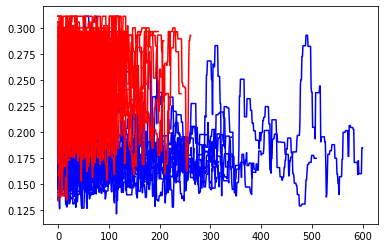

In [160]:
# window=10, max2 plot 그리기
import matplotlib.pyplot as plt

for i in range(len(window_normal_max2)) :
  plt.plot(window_normal_max2[i], 'b-')

for i in range(len(window_voice_phishing_max2)) :
  plt.plot(window_voice_phishing_max2[i], 'r-')


#plt.legend(['Normal', 'Voice Phishing'])

In [161]:
evaluate(window_voice_phishing_max2, window_normal_max2, 0.225, 2)

{'Acc': 0.8658227848101265, 'Recall': 0.83, 'Precision': 0.8972972972972973}

In [162]:
# Test set
window_voice_phishing_test_max2 = []
window_normal_test_max2 = []
for i in range(len(normal_test_token)) :
  window_normal_test_max2.append(detection_window(normal_test_token[i], keywords, ko_model, 10, 2))

for i in range(len(voice_phishing_test_token)) :
  window_voice_phishing_test_max2.append(detection_window(voice_phishing_test_token[i], keywords, ko_model, 10, 2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in float_scalars
  


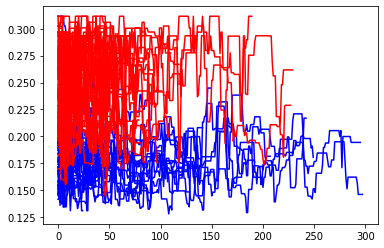

In [163]:
# window=10, max2 plot 그리기
import matplotlib.pyplot as plt

for i in range(len(window_normal_test_max2)) :
  plt.plot(window_normal_test_max2[i], 'b-')

for i in range(len(window_voice_phishing_test_max2)) :
  plt.plot(window_voice_phishing_test_max2[i], 'r-')


#plt.legend(['Normal', 'Voice Phishing'])

In [164]:
evaluate(window_voice_phishing_test_max2, window_normal_test_max2, 0.225, 2)

{'Acc': 0.8457142857142858,
 'Recall': 0.8275862068965517,
 'Precision': 0.8571428571428571}

#### 윈도우 내에서 EWMA (no padding) 이후 max2 뽑기

In [165]:
def EWMA(target, alpha) : 
  target_ = target[:]
  ewma = [target_[0]] # 초기값
  
  for i in range(1, len(target_)) :
    val = (1-alpha) * ewma[i-1] + alpha * target_[i] 
    ewma.append(val)
  
  return ewma
  

In [166]:
def detection_EWMA(target, keywords, model, window_size=10, max_n=2) :
  target_sim = []
  keywords_vect = []
  for i in range(len(keywords)) :
    keywords_vect.append(model[keywords[i]])

  for i in range(len(target)) :
    tmp_sum = 0
    for j in range(len(keywords_vect)) :
      tmp_sum += cos_sim(model[target[i]], keywords_vect[j])
    if np.isnan(tmp_sum) :
      continue
    target_sim.append(tmp_sum / len(keywords_vect))
  
  target_sim = EWMA(target_sim, 0.2)
  result = []
  for i in range(len(target_sim) - window_size + 1) :
    w_sim = target_sim[i:i+window_size]
    w_desc = sorted(w_sim, reverse=True)
    w_top = w_desc[:max_n]
    result.append(sum(w_top)/max_n)
  return result

In [167]:
def evaluate(voice_phishing, normal, threshold, count) :
  TP = 0
  TN = 0
  FP = 0
  FN = 0

  for i in range(len(voice_phishing)) :
    cnt = 0
    for j in range(len(voice_phishing[i])) :
      if voice_phishing[i][j] >= threshold :
        cnt += 1
    if cnt >= count :
      TP += 1
    else :
      FN += 1

  for i in range(len(normal)) :
    cnt = 0
    for j in range(len(normal[i])) :
      if normal[i][j] >= threshold :
        cnt += 1
    if cnt >= count :
      FP += 1
    else :
      TN += 1
  
  return {'Acc' : (TP + TN) / (TP + TN + FP + FN), 'Recall' : TP / (TP + FN), 'Precision' : TP / (TP + FP)}

In [168]:
window_voice_phishing_train_EWMA_max2 = []
window_normal_train_EWMA_max2 = []

for i in range(len(normal_train_token)) :
  window_normal_train_EWMA_max2.append(detection_EWMA(normal_train_token[i], keywords, ko_model, 10, 2))

for i in range(len(voice_phishing_train_token)) :
  window_voice_phishing_train_EWMA_max2.append(detection_EWMA(voice_phishing_train_token[i], keywords, ko_model, 10, 2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in float_scalars
  


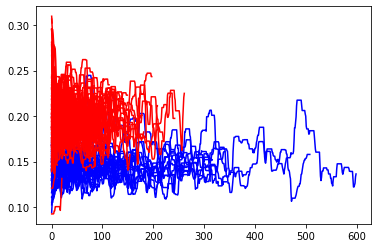

In [169]:
# window=10, max2 plot 그리기
import matplotlib.pyplot as plt

for i in range(len(window_normal_train_EWMA_max2)) :
  plt.plot(window_normal_train_EWMA_max2[i], 'b-')

for i in range(len(window_voice_phishing_train_EWMA_max2)) :
  plt.plot(window_voice_phishing_train_EWMA_max2[i], 'r-')


#plt.legend(['Normal', 'Voice Phishing'])

In [170]:
evaluate(window_voice_phishing_train_EWMA_max2, window_normal_train_EWMA_max2, 0.2, 2)

{'Acc': 0.8278481012658228, 'Recall': 0.69, 'Precision': 0.9583333333333334}

In [171]:
# Test set
window_voice_phishing_test_EWMA_max2 = []
window_normal_test_EWMA_max2 = []
for i in range(len(normal_test_token)) :
  window_normal_test_EWMA_max2.append(detection_EWMA(normal_test_token[i], keywords, ko_model, 10, 2))

for i in range(len(voice_phishing_test_token)) :
  window_voice_phishing_test_EWMA_max2.append(detection_EWMA(voice_phishing_test_token[i], keywords, ko_model, 10, 2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in float_scalars
  


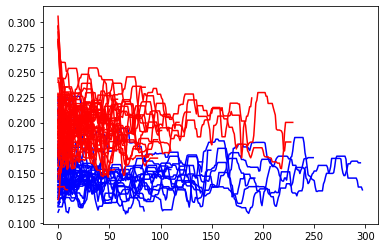

In [172]:
# window=10, max2 plot 그리기
import matplotlib.pyplot as plt

for i in range(len(window_normal_test_EWMA_max2)) :
  plt.plot(window_normal_test_EWMA_max2[i], 'b-')

for i in range(len(window_voice_phishing_test_EWMA_max2)) :
  plt.plot(window_voice_phishing_test_EWMA_max2[i], 'r-')


#plt.legend(['Normal', 'Voice Phishing'])

In [173]:
evaluate(window_voice_phishing_test_EWMA_max2, window_normal_test_EWMA_max2, 0.2, 2)

{'Acc': 0.8114285714285714,
 'Recall': 0.6781609195402298,
 'Precision': 0.921875}

#### MAX2를 EWMA 해보기. 윈도우가 진행됨에 따라 서서히 올라가는 형태가 되는지, & 조금더 안정적으로 되는지

In [174]:
def EWMA(target, alpha) : 
  target_ = target[:]
  ewma = [target_[0]] # 초기값
  
  for i in range(1, len(target_)) :
    val = (1-alpha) * ewma[i-1] + alpha * target_[i] 
    ewma.append(val)
  
  return ewma
  

In [175]:
def detection_window(target, keywords, model, window_size=10, max_n=2) :
  target_sim = []
  keywords_vect = []
  for i in range(len(keywords)) :
    keywords_vect.append(model[keywords[i]])

  for i in range(len(target)) :
    tmp_sum = 0
    for j in range(len(keywords_vect)) :
      tmp_sum += cos_sim(model[target[i]], keywords_vect[j])
    if np.isnan(tmp_sum) :
      continue
    target_sim.append(tmp_sum / len(keywords_vect))
  
  result = []
  for i in range(len(target_sim) - window_size + 1) :
    w_sim = target_sim[i:i+window_size]
    w_desc = sorted(w_sim, reverse=True)
    w_top = w_desc[:max_n]
    result.append(sum(w_top)/max_n)
  return result

In [176]:
def evaluate(voice_phishing, normal, threshold, count) :
  TP = 0
  TN = 0
  FP = 0
  FN = 0

  for i in range(len(voice_phishing)) :
    cnt = 0
    for j in range(len(voice_phishing[i])) :
      if voice_phishing[i][j] >= threshold :
        cnt += 1
    if cnt >= count :
      TP += 1
    else :
      FN += 1

  for i in range(len(normal)) :
    cnt = 0
    for j in range(len(normal[i])) :
      if normal[i][j] >= threshold :
        cnt += 1
    if cnt >= count :
      FP += 1
    else :
      TN += 1
  
  return {'Acc' : (TP + TN) / (TP + TN + FP + FN), 'Recall' : TP / (TP + FN), 'Precision' : TP / (TP + FP)}

In [177]:
window_voice_phishing_train_max2_EWMA = []
window_normal_train_max2_EWMA = []

for i in range(len(normal_train_token)) :
  window_normal_train_max2_EWMA.append(detection_window(normal_train_token[i], keywords, ko_model, 10, 2))

for i in range(len(voice_phishing_train_token)) :
  window_voice_phishing_train_max2_EWMA.append(detection_window(voice_phishing_train_token[i], keywords, ko_model, 10, 2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in float_scalars
  


In [178]:
"""
tmp = []
for i in range(len(window_normal_train_max2_EWMA)) :
  tmp.append(EWMA(window_normal_train_max2_EWMA[i], 0.2))
window_normal_train_max2_EWMA = tmp[:]

tmp = []
for i in range(len(window_voice_phishing_train_max2_EWMA)) :
  tmp.append(EWMA(window_voice_phishing_train_max2_EWMA[i], 0.2))
window_voice_phishing_train_max2_EWMA = tmp[:]
"""

'\ntmp = []\nfor i in range(len(window_normal_train_max2_EWMA)) :\n  tmp.append(EWMA(window_normal_train_max2_EWMA[i], 0.2))\nwindow_normal_train_max2_EWMA = tmp[:]\n\ntmp = []\nfor i in range(len(window_voice_phishing_train_max2_EWMA)) :\n  tmp.append(EWMA(window_voice_phishing_train_max2_EWMA[i], 0.2))\nwindow_voice_phishing_train_max2_EWMA = tmp[:]\n'

In [179]:
window_normal_train_max2_EWMA = [EWMA(e, 0.2) for e in window_normal_train_max2_EWMA if len(e) != 0]
window_voice_phishingl_train_max2_EWMA = [EWMA(e, 0.2) for e in window_voice_phishing_train_max2_EWMA if len(e) != 0]

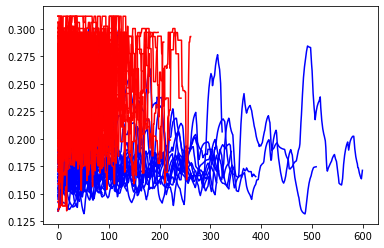

In [180]:
# window=10, max2 plot 그리기
import matplotlib.pyplot as plt

for i in range(len(window_normal_train_max2_EWMA)) :
  plt.plot(window_normal_train_max2_EWMA[i], 'b-')

for i in range(len(window_voice_phishing_train_max2_EWMA)) :
  plt.plot(window_voice_phishing_train_max2_EWMA[i], 'r-')


#plt.legend(['Normal', 'Voice Phishing'])

In [181]:
evaluate(window_voice_phishing_train_max2_EWMA, window_normal_train_max2_EWMA, 0.225, 2)

{'Acc': 0.8504672897196262, 'Recall': 0.83, 'Precision': 0.9222222222222223}

In [182]:
# Test
window_voice_phishing_test_max2_EWMA = []
window_normal_test_max2_EWMA = []

for i in range(len(normal_test_token)) :
  window_normal_test_max2_EWMA.append(detection_window(normal_test_token[i], keywords, ko_model, 10, 2))

for i in range(len(voice_phishing_test_token)) :
  window_voice_phishing_test_max2_EWMA.append(detection_window(voice_phishing_test_token[i], keywords, ko_model, 10, 2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in float_scalars
  


In [183]:
window_normal_test_max2_EWMA = [EWMA(e, 0.2) for e in window_normal_test_max2_EWMA if len(e) != 0]
window_voice_phishingl_test_max2_EWMA = [EWMA(e, 0.2) for e in window_voice_phishing_test_max2_EWMA if len(e) != 0]

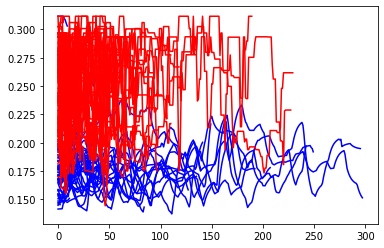

In [184]:
# window=10, max2 plot 그리기
import matplotlib.pyplot as plt

for i in range(len(window_normal_test_max2_EWMA)) :
  plt.plot(window_normal_test_max2_EWMA[i], 'b-')

for i in range(len(window_voice_phishing_test_max2_EWMA)) :
  plt.plot(window_voice_phishing_test_max2_EWMA[i], 'r-')


#plt.legend(['Normal', 'Voice Phishing'])

In [185]:
evaluate(window_voice_phishing_test_max2_EWMA, window_normal_test_max2_EWMA, 0.225, 2)

{'Acc': 0.8445945945945946, 'Recall': 0.8275862068965517, 'Precision': 0.9}

#### Window같은거 설정하지 말고, 단순히 EWMA만 사용해보기.

In [54]:
# 일반적인 상황만 이야기 하다가 갑자기 절대단어와 비슷한 단어 말하면 -> 이전까지가 일반적인 상황이었기에 크게 늘어나지 않음
# 보이스피싱 관련 이야기 하다가 갑자기 일반적인 단어를 몇개 말하면 -> 이전까지가 보이스피싱 관련 이야기였기에 크게 줄어들지 않음
# -> alpha는 작게? 0.2정도? 0.3?

In [55]:
def EWMA(target, alpha) : 
  target_ = target[:]
  ewma = [target_[0]] # 초기값
  
  for i in range(1, len(target_)) :
    val = (1-alpha) * ewma[i-1] + alpha * target_[i] 
    ewma.append(val)
  
  return ewma

In [56]:
def detection(target, keywords, model) :
  target_sim = []
  keywords_vect = []
  for i in range(len(keywords)) :
    keywords_vect.append(model[keywords[i]])

  for i in range(len(target)) :
    tmp_sum = 0
    for j in range(len(keywords_vect)) :
      tmp_sum += cos_sim(model[target[i]], keywords_vect[j])
    if np.isnan(tmp_sum) :
      continue
    target_sim.append(tmp_sum / len(keywords_vect))
  
  return target_sim

In [ ]:
voice_phishing_train_EWMA_ = []
normal_train_EWMA_ = []

for i in range(len(normal_train_token)) :
  normal_train_EWMA_.append(detection(normal_train_token[i], keywords, ko_model))

for i in range(len(voice_phishing_train_token)) :
  voice_phishing_train_EWMA_.append(detection(voice_phishing_train_token[i], keywords, ko_model))

In [64]:
voice_phishing_train_EWMA = [EWMA(e, 0.3) for e in voice_phishing_train_EWMA_]
normal_train_EWMA = [EWMA(e, 0.3) for e in normal_train_EWMA_]

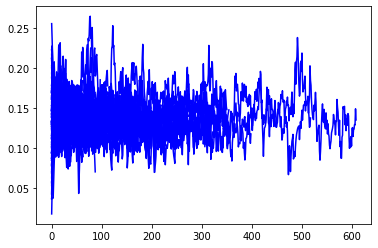

In [74]:
# window=10, max2 plot 그리기
import matplotlib.pyplot as plt

for i in range(len(normal_train_EWMA)) :
  plt.plot(normal_train_EWMA[i], 'b-')

for i in range(len(voice_phishing_train_EWMA)) :
  plt.plot(voice_phishing_train_EWMA[i], 'r-')


#plt.legend(['Normal', 'Voice Phishing'])

#### Sim만 한번 분석해보기 (진짜 Variance의 차이가 있는가?)

In [80]:
def detection(target, keywords, model) :
  target_sim = []
  keywords_vect = []
  for i in range(len(keywords)) :
    keywords_vect.append(model[keywords[i]])

  for i in range(len(target)) :
    tmp_sum = 0
    for j in range(len(keywords_vect)) :
      tmp_sum += cos_sim(model[target[i]], keywords_vect[j])
    if np.isnan(tmp_sum) :
      continue
    target_sim.append(tmp_sum / len(keywords_vect))
  
  return target_sim

In [ ]:
voice_phishing_train_basic = []
normal_train_basic = []

for i in range(len(normal_train_token)) :
  normal_train_basic.append(detection(normal_train_token[i], keywords, ko_model))

for i in range(len(voice_phishing_train_token)) :
  voice_phishing_train_basic.append(detection(voice_phishing_train_token[i], keywords, ko_model))

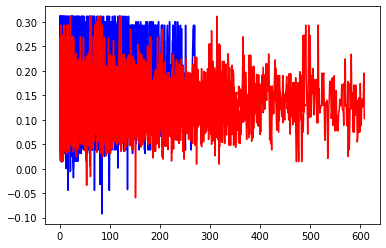

In [85]:
# window=10, max2 plot 그리기
import matplotlib.pyplot as plt

for i in range(len(voice_phishing_train_basic)) :
  plt.plot(voice_phishing_train_basic[i], 'b-')

for i in range(len(normal_train_basic)) :
  plt.plot(normal_train_basic[i], 'r-')


#plt.legend(['Normal', 'Voice Phishing'])

In [86]:
# 결론! max2로만 해보는게 나을지도ㅎㅎ

#### 윈도우별로 MAX2 -> EWMA -> 차이

In [186]:
def EWMA(target, alpha) : 
  target_ = target[:]
  ewma = [target_[0]] # 초기값
  
  for i in range(1, len(target_)) :
    val = (1-alpha) * ewma[i-1] + alpha * target_[i] 
    ewma.append(val)
  
  return ewma
  

In [187]:
def detection_window(target, keywords, model, window_size=10, max_n=2) :
  target_sim = []
  keywords_vect = []
  for i in range(len(keywords)) :
    keywords_vect.append(model[keywords[i]])

  for i in range(len(target)) :
    tmp_sum = 0
    for j in range(len(keywords_vect)) :
      tmp_sum += cos_sim(model[target[i]], keywords_vect[j])
    if np.isnan(tmp_sum) :
      continue
    target_sim.append(tmp_sum / len(keywords_vect))
  
  result = []
  for i in range(len(target_sim) - window_size + 1) :
    w_sim = target_sim[i:i+window_size]
    w_desc = sorted(w_sim, reverse=True)
    w_top = w_desc[:max_n]
    result.append(sum(w_top)/max_n)
  return result

In [ ]:
window_voice_phishing_train_max2_EWMA_variance = []
window_normal_train_max2_EWMA_variance = []

for i in range(len(normal_train_token)) :
  window_normal_train_max2_EWMA_variance.append(detection_window(normal_train_token[i], keywords, ko_model, 10, 2))

for i in range(len(voice_phishing_train_token)) :
  window_voice_phishing_train_max2_EWMA_variance.append(detection_window(voice_phishing_train_token[i], keywords, ko_model, 10, 2))

In [189]:
window_normal_train_max2_EWMA_variance = [EWMA(e, 0.2) for e in window_normal_train_max2_EWMA_variance if len(e) != 0]
window_voice_phishingl_train_max2_EWMA_variance = [EWMA(e, 0.2) for e in window_voice_phishing_train_max2_EWMA_variance if len(e) != 0]

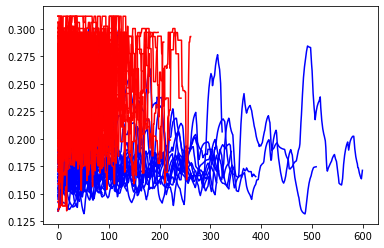

In [190]:
# window=10, max2 plot 그리기
import matplotlib.pyplot as plt

for i in range(len(window_normal_train_max2_EWMA_variance)) :
  plt.plot(window_normal_train_max2_EWMA_variance[i], 'b-')

for i in range(len(window_voice_phishing_train_max2_EWMA_variance)) :
  plt.plot(window_voice_phishing_train_max2_EWMA_variance[i], 'r-')


#plt.legend(['Normal', 'Voice Phishing'])

In [191]:
window_normal_train_max2_EWMA_diff = [] # EWMA의 차이값
window_voice_phishing_train_max2_EWMA_diff = []

for i in range(len(window_normal_train_max2_EWMA_variance)) :
  tmp = []
  for j in range(1, len(window_normal_train_max2_EWMA_variance[i])) :
    tmp.append(abs(window_normal_train_max2_EWMA_variance[i][j] - window_normal_train_max2_EWMA_variance[i][j-1]))
  window_normal_train_max2_EWMA_diff.append(tmp)

for i in range(len(window_voice_phishing_train_max2_EWMA_variance)) :
  tmp = []
  for j in range(1, len(window_voice_phishing_train_max2_EWMA_variance[i])) :
    tmp.append(abs(window_voice_phishing_train_max2_EWMA_variance[i][j] - window_voice_phishing_train_max2_EWMA_variance[i][j-1]))
  window_voice_phishing_train_max2_EWMA_diff.append(tmp)

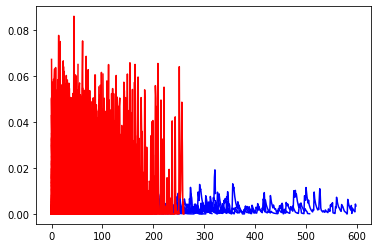

In [192]:
# window=10, max2 plot 그리기
import matplotlib.pyplot as plt

for i in range(len(window_normal_train_max2_EWMA_diff)) :
  plt.plot(window_normal_train_max2_EWMA_diff[i], 'b-')

for i in range(len(window_voice_phishing_train_max2_EWMA_diff)) :
  plt.plot(window_voice_phishing_train_max2_EWMA_diff[i], 'r-')


#plt.legend(['Normal', 'Voice Phishing'])

In [193]:
def evaluate(voice_phishing, normal, threshold) :
  TP = 0
  TN = 0
  FP = 0
  FN = 0

  for i in range(len(voice_phishing)) :
    if len(voice_phishing[i]) == 0 :
      continue
    max_ = max(voice_phishing[i])
    if max_ >= threshold :
      TP += 1
    else :
      FN += 1
  for i in range(len(normal)) :
    if len(normal[i]) == 0 :
      continue
    max_ = max(normal[i])
    if max_ >= threshold :
      FP += 1
    else :
      TN += 1
  
  return {'Acc' : (TP + TN) / (TP + TN + FP + FN), 'Recall' : TP / (TP + FN), 'Precision' : TP / (TP + FP)}

In [194]:
evaluate(window_voice_phishing_train_max2_EWMA_diff, window_normal_train_max2_EWMA_diff, 0.02)

{'Acc': 0.9475524475524476, 'Recall': 0.9122807017543859, 'Precision': 1.0}

In [195]:
# test
window_voice_phishing_test_max2_EWMA_variance = []
window_normal_test_max2_EWMA_variance = []

for i in range(len(normal_test_token)) :
  window_normal_test_max2_EWMA_variance.append(detection_window(normal_test_token[i], keywords, ko_model, 10, 2))

for i in range(len(voice_phishing_test_token)) :
  window_voice_phishing_test_max2_EWMA_variance.append(detection_window(voice_phishing_test_token[i], keywords, ko_model, 10, 2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in float_scalars
  


In [196]:
window_normal_test_max2_EWMA_variance = [EWMA(e, 0.2) for e in window_normal_test_max2_EWMA_variance if len(e) != 0]
window_voice_phishingl_test_max2_EWMA_variance = [EWMA(e, 0.2) for e in window_voice_phishing_test_max2_EWMA_variance if len(e) != 0]

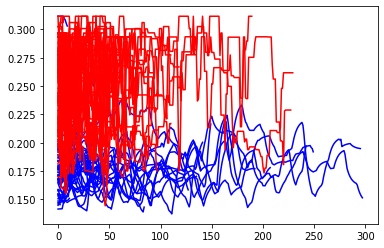

In [197]:
# window=10, max2 plot 그리기
import matplotlib.pyplot as plt

for i in range(len(window_normal_test_max2_EWMA_variance)) :
  plt.plot(window_normal_test_max2_EWMA_variance[i], 'b-')

for i in range(len(window_voice_phishing_test_max2_EWMA_variance)) :
  plt.plot(window_voice_phishing_test_max2_EWMA_variance[i], 'r-')


#plt.legend(['Normal', 'Voice Phishing'])

In [198]:
window_normal_test_max2_EWMA_diff = [] # EWMA의 차이값
window_voice_phishing_test_max2_EWMA_diff = []

for i in range(len(window_normal_test_max2_EWMA_variance)) :
  tmp = []
  for j in range(1, len(window_normal_test_max2_EWMA_variance[i])) :
    tmp.append(abs(window_normal_test_max2_EWMA_variance[i][j] - window_normal_test_max2_EWMA_variance[i][j-1]))
  window_normal_test_max2_EWMA_diff.append(tmp)

for i in range(len(window_voice_phishing_test_max2_EWMA_variance)) :
  tmp = []
  for j in range(1, len(window_voice_phishing_test_max2_EWMA_variance[i])) :
    tmp.append(abs(window_voice_phishing_test_max2_EWMA_variance[i][j] - window_voice_phishing_test_max2_EWMA_variance[i][j-1]))
  window_voice_phishing_test_max2_EWMA_diff.append(tmp)

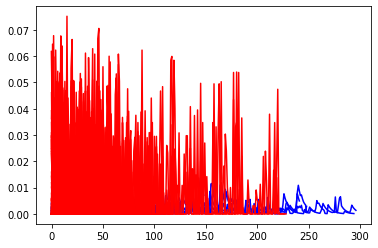

In [199]:
# window=10, max2 plot 그리기
import matplotlib.pyplot as plt

for i in range(len(window_normal_test_max2_EWMA_diff)) :
  plt.plot(window_normal_test_max2_EWMA_diff[i], 'b-')

for i in range(len(window_voice_phishing_test_max2_EWMA_diff)) :
  plt.plot(window_voice_phishing_test_max2_EWMA_diff[i], 'r-')


#plt.legend(['Normal', 'Voice Phishing'])

In [200]:
evaluate(window_voice_phishing_test_max2_EWMA_diff, window_normal_test_max2_EWMA_diff, 0.02)

{'Acc': 0.9485294117647058, 'Recall': 0.9066666666666666, 'Precision': 1.0}